### **DATA IMPORT**

In [1]:
# importing dataset
import pandas as pd

datawave_df = pd.read_csv('DataWave_Music_Sprint_Dataset - DataWave_Music_Sprint_Dataset.csv')
cleaned_datawave_df = datawave_df.copy()

In [2]:
# Number of rows and columns in dataset
cleaned_datawave_df.shape

(705, 12)

In [3]:
# Summary of dataset
cleaned_datawave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       695 non-null    object 
 1   country                       705 non-null    object 
 2   age                           705 non-null    int64  
 3   gender                        626 non-null    object 
 4   subscription_type             705 non-null    object 
 5   avg_listening_hours_per_week  705 non-null    float64
 6   total_songs_played            705 non-null    int64  
 7   skip_rate                     705 non-null    object 
 8   satisfaction_score            661 non-null    float64
 9   churned                       705 non-null    object 
 10  monthly_fee                   672 non-null    object 
 11  join_date                     705 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 66.2+ KB


In [4]:
#checking column names
cleaned_datawave_df.columns

Index(['user_id', 'country', 'age', 'gender', 'subscription_type',
       'avg_listening_hours_per_week', 'total_songs_played', 'skip_rate',
       'satisfaction_score', 'churned', 'monthly_fee', 'join_date'],
      dtype='object')

## **DATA CLEANING**

## Dealing with NaNs

In [5]:
# checking the number of missing values in each column
cleaned_datawave_df.isna().sum()

user_id                         10
country                          0
age                              0
gender                          79
subscription_type                0
avg_listening_hours_per_week     0
total_songs_played               0
skip_rate                        0
satisfaction_score              44
churned                          0
monthly_fee                     33
join_date                        0
dtype: int64

In [6]:
# rows with missing user_id values
cleaned_datawave_df[cleaned_datawave_df['user_id'].isna()]

,user_id,country,age,gender,subscription_type,avg_listening_hours_per_week,total_songs_played,skip_rate,satisfaction_score,churned,monthly_fee,join_date
101,NaN,UK,50,female,Student,0.9,533,10%,4.0,no,0,05/07/2022
215,NaN,India,50,Female,Premium,9.1,484,25%,2.0,no,12.99,07/25/2023
257,NaN,USA,40,female,Free,8.5,501,0.1,5.0,1,9.99 USD,08/01/2024
261,NaN,Brazil,61,male,Premium,13.4,512,25%,5.0,no,0,01/15/2022
277,NaN,United Kingdom,40,male,Student,5.0,488,ten,2.0,0,7.99,05/02/2024
483,NaN,India,61,Female,Fam,16.1,494,30%,3.0,1,9.99,11/08/2022
538,NaN,Nigeria,37,female,Family,0.2,503,ten,2.0,1,12.99,17/08/2022
651,NaN,U.K.,26,female,Student,10.9,490,20%,4.0,no,9.99,25/12/2023
660,NaN,South Africa,22,female,Studnt,4.4,455,30%,4.0,0,7.99,01/21/2024
668,NaN,USA,16,female,Studnt,11.8,520,15%,3.0,0,9.99,23/09/2022


##### I dropped the missing user_id rows because it cannot be imputed or inferred from other data. Since it's only a small amount (10 out of 700 rows), we can do without the data

In [7]:
# drop the missing values in 'user_id' column.
cleaned_datawave_df = cleaned_datawave_df.dropna(subset=['user_id'])

In [8]:
# checking the number of missing values in each column
cleaned_datawave_df.isna().sum()

user_id                          0
country                          0
age                              0
gender                          79
subscription_type                0
avg_listening_hours_per_week     0
total_songs_played               0
skip_rate                        0
satisfaction_score              44
churned                          0
monthly_fee                     33
join_date                        0
dtype: int64

##### I replaced the missing values with 'Prefer Not To Say' because firstly, deleting was not an option since it was a large number of values missing. Secondly, imputing this column with male/female/other would've been invasive since this is sensitive data


In [9]:
#replacing missing values in gender column with 'prefer not to say'
cleaned_datawave_df['gender'] = cleaned_datawave_df['gender'].fillna('prefer not to say')

In [10]:
# checking the number of missing values in each column
cleaned_datawave_df.isna().sum()

user_id                          0
country                          0
age                              0
gender                           0
subscription_type                0
avg_listening_hours_per_week     0
total_songs_played               0
skip_rate                        0
satisfaction_score              44
churned                          0
monthly_fee                     33
join_date                        0
dtype: int64

In [11]:
# showing unique values in satisfaction_score column
cleaned_datawave_df['satisfaction_score'].unique()

array([ 2.,  3.,  5.,  1.,  4., nan])

##### I'm imputing the missing values in the satisfaction_score column with the median satisfaction score. This column holds ordinal numerical data (1.0 to 5.0 with each representing a level of satisfaction from very unsatisfied to very satisfied). If I use the mean, the imputed values could be non-integer values like 3.6 which don't make sense in this context
##### *Note: Even though I use mode, it would've given me the same thing but on the flip side if a certain rating was way higher than the others in mode it would've distorted the data more than the median would*

In [12]:
# replacing missing values in satisfaction_score column with median value
cleaned_datawave_df['satisfaction_score'] = cleaned_datawave_df['satisfaction_score'].fillna(cleaned_datawave_df['satisfaction_score'].median())

In [13]:
# checking the number of missing values in each column
cleaned_datawave_df.isna().sum()

user_id                          0
country                          0
age                              0
gender                           0
subscription_type                0
avg_listening_hours_per_week     0
total_songs_played               0
skip_rate                        0
satisfaction_score               0
churned                          0
monthly_fee                     33
join_date                        0
dtype: int64

In [14]:
# checking the unique values in the monthly_fee column - to see what type of values are in this column
cleaned_datawave_df['monthly_fee'].unique()

array(['7.99', '0', '12.99', '9.99', '5', '9.99 USD', nan], dtype=object)

In [15]:
# removing ' USD' from the monthly_fee column and converting it to float
cleaned_datawave_df['monthly_fee'] = cleaned_datawave_df['monthly_fee'].str.replace(' USD', '', regex=True).astype(float)

In [16]:
# checking the unique values in the monthly_fee column
cleaned_datawave_df['monthly_fee'].unique()

array([ 7.99,  0.  , 12.99,  9.99,  5.  ,   nan])

##### I used the median monthly fee to fill in the missing values in the monthly_fee column for similar reasons as the satisfaction_score column

In [17]:
# replacing missing values in monthly_fee column with median value
cleaned_datawave_df['monthly_fee'] = cleaned_datawave_df['monthly_fee'].fillna(cleaned_datawave_df['monthly_fee'].median())

In [18]:
# checking the number of missing values in each column
cleaned_datawave_df.isna().sum()

user_id                         0
country                         0
age                             0
gender                          0
subscription_type               0
avg_listening_hours_per_week    0
total_songs_played              0
skip_rate                       0
satisfaction_score              0
churned                         0
monthly_fee                     0
join_date                       0
dtype: int64

## user_id column

In [19]:
# to see if there are any duplicate user_ids
cleaned_datawave_df['user_id'][cleaned_datawave_df['user_id'].duplicated()].unique()

array(['U1038', 'U1102', 'U1453', 'U1383', 'U1617'], dtype=object)

In [20]:
# rows that have duplicate data in all columns for user_id
cleaned_datawave_df[cleaned_datawave_df['user_id'].duplicated(keep=False)]

,user_id,country,age,gender,subscription_type,avg_listening_hours_per_week,total_songs_played,skip_rate,satisfaction_score,churned,monthly_fee,join_date
23,U1038,United Kingdom,48,male,Free,6.7,485,15%,2.0,0,9.99,02/21/2023
91,U1617,Nigeria,61,male,Premium,4.3,482,0.1,3.0,0,9.99,28/07/2023
98,U1453,India,51,F,Premium,15.5,502,ten,2.0,0,9.99,12/15/2022
361,U1038,United Kingdom,48,male,Free,6.7,485,15%,2.0,0,9.99,02/21/2023
423,U1102,Ghana,49,male,Student,15.7,532,5%,2.0,0,0.00,03/29/2023
430,U1383,Ghana,52,female,Student,4.2,471,5%,4.0,0,0.00,17/11/2023
466,U1102,Ghana,49,male,Student,15.7,532,5%,2.0,0,0.00,03/29/2023
470,U1453,India,51,F,Premium,15.5,502,ten,2.0,0,9.99,12/15/2022
528,U1383,Ghana,52,female,Student,4.2,471,5%,4.0,0,0.00,17/11/2023
638,U1617,Nigeria,61,male,Premium,4.3,482,0.1,3.0,0,9.99,28/07/2023


In [21]:
# removing duplicate rows
cleaned_datawave_df = cleaned_datawave_df.drop_duplicates()

In [22]:
# to see if there are any duplicate user_ids
cleaned_datawave_df['user_id'][cleaned_datawave_df['user_id'].duplicated()].unique()

array([], dtype=object)

## country column

In [23]:
# showing unique values in country column
cleaned_datawave_df['country'].unique()

array(['Nepal', 'USA', 'Nigeria', 'Ghana', 'United Kingdom', 'IND',
       'Kenya', 'UK', 'South Africa', 'U.K.', 'India', 'Brazil'],
      dtype=object)

In [24]:
# standardizing country names
for country in cleaned_datawave_df['country'].unique():
    if country == 'IND':
        cleaned_datawave_df['country'] = cleaned_datawave_df['country'].replace(country, 'India')
    elif country == 'United Kingdom' or country == 'U.K.':
        cleaned_datawave_df['country'] = cleaned_datawave_df['country'].replace(country, 'UK')

cleaned_datawave_df['country'].unique()

array(['Nepal', 'USA', 'Nigeria', 'Ghana', 'UK', 'India', 'Kenya',
       'South Africa', 'Brazil'], dtype=object)

## age column

In [25]:
# checking the unique values in the age column
cleaned_datawave_df['age'].unique()

array([23, 63, 45, 16, 29, 59, 57, 41, 39, 64, 49, 46, 38, 50, 48, 18, 33,
       13, 26, 20, 24, 36, 52, 17, 58, 62, 25, 61, 43, 60, 40, 54, 42, 19,
       37, 21, 30, 35, 44, 15, 27, 47, 22, 34, 53, 31, 55, 51, 14, 32, 28,
       56])

In [26]:
# checking the data type of the age column
cleaned_datawave_df['age'].dtype

dtype('int64')

## gender column

In [27]:
# checking unique values in the gender column
cleaned_datawave_df['gender'].unique()

array(['F', 'male', 'M', 'female', 'prefer not to say', 'Male', 'Female',
       'Other'], dtype=object)

In [28]:
# standardizing gender
for gender in cleaned_datawave_df['gender'].unique():
    if gender == 'F':
        cleaned_datawave_df['gender'] = cleaned_datawave_df['gender'].replace(gender, 'Female')
    elif gender == 'M':
        cleaned_datawave_df['gender'] = cleaned_datawave_df['gender'].replace(gender, 'Male')

cleaned_datawave_df['gender'].unique()

array(['Female', 'male', 'Male', 'female', 'prefer not to say', 'Other'],
      dtype=object)

In [29]:
# standardizing gender
cleaned_datawave_df['gender'] = cleaned_datawave_df['gender'].str.title()

cleaned_datawave_df['gender'].unique()

array(['Female', 'Male', 'Prefer Not To Say', 'Other'], dtype=object)

## subscription_type column

In [30]:
# checking the unique values in the subcription_type column
cleaned_datawave_df['subscription_type'].unique()

array(['Premum', 'Student', 'Family', 'Free', 'Premium', 'Studnt', 'Fam'],
      dtype=object)

In [31]:
# standardizing subcription type
for sub in cleaned_datawave_df['subscription_type'].unique():
    if sub == 'Premum':
        cleaned_datawave_df['subscription_type'] = cleaned_datawave_df['subscription_type'].replace(sub, 'Premium')
    elif sub == 'Studnt':
        cleaned_datawave_df['subscription_type'] = cleaned_datawave_df['subscription_type'].replace(sub, 'Student')
    elif sub == 'Fam':
        cleaned_datawave_df['subscription_type'] = cleaned_datawave_df['subscription_type'].replace(sub, 'Family')

cleaned_datawave_df['subscription_type'].unique()

array(['Premium', 'Student', 'Family', 'Free'], dtype=object)

##### It seems like the monthly fee for the different subcription types are mismatched. For instance, Free still has a charge and users on the same subscription type are charged different fees.

In [32]:

print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee'] == 5.0)].shape[0])

65
73
15
33
21


In [33]:
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Premium') & (cleaned_datawave_df['monthly_fee'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Premium') & (cleaned_datawave_df['monthly_fee'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Premium') & (cleaned_datawave_df['monthly_fee'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Premium') & (cleaned_datawave_df['monthly_fee'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Premium') & (cleaned_datawave_df['monthly_fee'] == 5.0)].shape[0])

54
65
19
26
20


In [34]:
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee'] == 5.0)].shape[0])

52
68
24
30
24


In [35]:
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Free') & (cleaned_datawave_df['monthly_fee'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Free') & (cleaned_datawave_df['monthly_fee'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Free') & (cleaned_datawave_df['monthly_fee'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Free') & (cleaned_datawave_df['monthly_fee'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Free') & (cleaned_datawave_df['monthly_fee'] == 5.0)].shape[0])

35
34
10
15
7


In [36]:
# checking the unique values in the monthly_fee column
cleaned_datawave_df['monthly_fee'].unique()

array([ 7.99,  0.  , 12.99,  9.99,  5.  ])

In [37]:
# checking the unique values in the subcription_type column
cleaned_datawave_df['subscription_type'].unique()

array(['Premium', 'Student', 'Family', 'Free'], dtype=object)

##### I will make a different column for updated monthly fees where I would try to match subscription to the right fees. However, I cannot confirm if the fees are accurately matched with the subscriptions so I won't use it in the analysis

In [38]:
# creating another column for updated monthly fee
cleaned_datawave_df['monthly_fee_updated'] = cleaned_datawave_df['monthly_fee']

In [39]:
fee_map = {
    'Free': 0.0,
    'Student': 5.0,
    'Family': 12.99,
    'Premium': 9.99
}

# Apply the mapping
cleaned_datawave_df['monthly_fee_updated'] = cleaned_datawave_df['subscription_type'].map(fee_map)

In [40]:
# flag rows where the fee changed
cleaned_datawave_df['fee_changed'] = cleaned_datawave_df['monthly_fee'] != cleaned_datawave_df['monthly_fee_updated']

In [41]:
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee_updated'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee_updated'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee_updated'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee_updated'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Family') & (cleaned_datawave_df['monthly_fee_updated'] == 5.0)].shape[0])

0
0
207
0
0


In [42]:
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee_updated'] == 7.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee_updated'] == 9.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee_updated'] == 12.99)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee_updated'] == 0.0)].shape[0])
print(cleaned_datawave_df[(cleaned_datawave_df['subscription_type'] == 'Student') & (cleaned_datawave_df['monthly_fee_updated'] == 5.0)].shape[0])

0
0
0
0
198


In [43]:
cleaned_datawave_df['monthly_fee_updated'].value_counts()

monthly_fee_updated
12.99    207
5.00     198
9.99     184
0.00     101
Name: count, dtype: int64

In [44]:
cleaned_datawave_df['fee_changed'].value_counts()

fee_changed
True     571
False    119
Name: count, dtype: int64

In [45]:
cleaned_datawave_df

,user_id,country,age,gender,subscription_type,avg_listening_hours_per_week,total_songs_played,skip_rate,satisfaction_score,churned,monthly_fee,join_date,monthly_fee_updated,fee_changed
0,U1403,Nepal,23,Female,Premium,11.5,510,5%,2.0,0,7.99,03/21/2024,9.99,True
1,U1165,Nepal,63,Male,Student,11.3,526,5%,3.0,0,0.00,08/10/2023,5.00,True
2,U1474,USA,45,Female,Premium,2.0,476,30%,3.0,0,7.99,04/05/2022,9.99,True
3,U1478,Nigeria,16,Female,Family,12.1,529,20%,5.0,yes,12.99,12/16/2023,12.99,False
4,U1609,Ghana,29,Male,Free,6.4,477,0.2,3.0,0,7.99,03/28/2022,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,U1584,UK,30,Male,Student,19.2,458,30%,4.0,no,7.99,07/21/2023,5.00,True
701,U1143,India,14,Prefer Not To Say,Premium,10.2,518,10%,4.0,0,9.99,03/03/2024,9.99,False
702,U1524,India,55,Male,Premium,5.5,517,5%,4.0,0,0.00,25/10/2023,9.99,True
703,U1046,Kenya,48,Female,Free,1.0,562,30%,5.0,no,0.00,02/06/2022,0.00,False


### avg_listening_hours_per_week column

In [46]:
# checking the unique values in the avg_listening_hours_per_week column
cleaned_datawave_df['avg_listening_hours_per_week'].unique()

array([11.5, 11.3,  2. , 12.1,  6.4, 11. ,  7.4, 21.5,  7.5, 18.7,  7.6,
       11.2,  3.7,  1.5, 11.8,  8.7,  9.5, 14.6, 10.4,  6.7,  4.5, 10.5,
        7.8,  9.2,  8. , 15.2, 10.9, 12.8, 10.7,  9. ,  6.9, 12.3, 12.5,
        7.7,  3.2, 14.4, 13.3, 10. ,  7.1,  4.6,  9.8,  4.4,  3. ,  8.9,
       14.8, 15.8,  6. , 10.2, 15.5,  7. ,  7.3,  9.9, 17.5, 13.8, 19.3,
        0.2, 10.3, 12.6,  5.9,  4.1,  5.1, 14.2, 11.7,  4.3, 16.8,  1.3,
       12.9,  8.5, 15. ,  5.2, 14.1,  9.3,  8.3, 14.5,  5.8, 13.9,  4. ,
        1. , 17.3,  6.8,  1.2,  3.3, 13.5, 13.1,  3.6,  6.2, 13. ,  2.9,
       12.4, 13.4, 17.4,  2.8, 15.9,  9.7, 16.6, 11.9, 12.7,  6.5,  9.6,
        3.9, 17.9,  6.3,  5.4, 13.2,  8.1, 16.1,  5.7,  2.4,  9.4, 10.6,
       23.4, 11.1,  0.9,  7.9, 16.5,  4.7,  8.2,  4.8, 13.6, 20.5,  1.4,
        2.6, 18.8, 13.7,  8.4, 16.9, 16.2, 11.6,  0.8, 10.8,  5.6, 19.1,
       14.3,  2.5, 19. ,  0.7,  0.3, 15.7, 15.1,  9.1, 18.4, 12. ,  3.8,
       22.1, 17.2, 23.3,  0.6, 16.3, 21.7,  0.5,  1

### total_songs_played column

In [47]:
# checking the unique values in the total_songs_played column
cleaned_datawave_df['total_songs_played'].unique()

array([510, 526, 476, 529, 477, 548, 502, 514, 494, 482, 440, 508, 509,
       507, 458, 527, 511, 454, 512, 522, 478, 498, 485, 486, 481, 496,
       473, 517, 524, 500, 459, 528, 442, 519, 520, 535, 475, 493, 542,
       491, 530, 531, 472, 483, 492, 490, 518, 513, 471, 532, 488, 480,
       479, 523, 504, 506, 516, 463, 474, 525, 466, 497, 505, 489, 503,
       495, 469, 464, 534, 487, 533, 484, 468, 561, 571, 457, 543, 455,
       499, 541, 501, 452, 539, 566, 565, 456, 515, 461, 545, 556, 536,
       467, 563, 521, 537, 460, 462, 544, 450, 453, 451, 470, 558, 554,
       441, 549, 444, 551, 546, 465, 538, 562])

### skip_rate column

In [48]:
# checking the unique values in the skip_rate column
cleaned_datawave_df['skip_rate'].unique()

array(['5%', '30%', '20%', '0.2', '25%', '15%', '10%', 'ten', '0.1'],
      dtype=object)

In [49]:
# standardizing skip rate
for rate in cleaned_datawave_df['skip_rate'].unique():
    if rate == 'ten' or rate == '0.1':
        cleaned_datawave_df['skip_rate'] = cleaned_datawave_df['skip_rate'].replace(rate, '10%')
    elif rate == '0.2':
        cleaned_datawave_df['skip_rate'] = cleaned_datawave_df['skip_rate'].replace(rate, '20%')

cleaned_datawave_df['skip_rate'].unique()

array(['5%', '30%', '20%', '25%', '15%', '10%'], dtype=object)

In [50]:
# removing '%' from the skip rate column and converting it to float
cleaned_datawave_df['skip_rate'] = cleaned_datawave_df['skip_rate'].str.replace('%', '', regex=True).astype(int)

cleaned_datawave_df['skip_rate'].unique()

array([ 5, 30, 20, 25, 15, 10])

In [51]:
# standardizing skip rate - changing from percentage to decimal
for rate in cleaned_datawave_df['skip_rate'].unique():
    cleaned_datawave_df['skip_rate'] = cleaned_datawave_df['skip_rate'].replace(rate, rate/100)

cleaned_datawave_df['skip_rate'].unique()

array([0.05, 0.3 , 0.2 , 0.25, 0.15, 0.1 ])

### satisfaction_score column

In [52]:
# checking the unique values in the satisfaction_score column
cleaned_datawave_df['satisfaction_score'].unique()

array([2., 3., 5., 1., 4.])

### churned column

In [53]:
# checking the unique values in the churned column
cleaned_datawave_df['churned'].unique()

array(['0', 'yes', '1', 'no'], dtype=object)

In [54]:
# standardizing churned column
for churn in cleaned_datawave_df['churned'].unique():
    if churn == 'yes':
        cleaned_datawave_df['churned'] = cleaned_datawave_df['churned'].replace(churn, '1')
    elif churn == 'no':
        cleaned_datawave_df['churned'] = cleaned_datawave_df['churned'].replace(churn, '0')

cleaned_datawave_df['churned'].unique()

array(['0', '1'], dtype=object)

In [55]:
# converting churned column to integer type
cleaned_datawave_df['churned'] = cleaned_datawave_df['churned'].astype(int)
cleaned_datawave_df['churned'].unique()

array([0, 1])

### monthly_fee column

In [56]:
# checking the unique values in the monthly_fee column - to confirm the changes
cleaned_datawave_df['monthly_fee'].unique()

array([ 7.99,  0.  , 12.99,  9.99,  5.  ])

### join_date column

In [57]:
# checking the unique values in the join_date column
cleaned_datawave_df['join_date'].unique()

array(['03/21/2024', '08/10/2023', '04/05/2022', '12/16/2023',
       '03/28/2022', '04/25/2022', '27/06/2022', '01/12/2022',
       '12/02/2022', '10/24/2022', '31/01/2022', '09/05/2022',
       '05/02/2022', '02/15/2023', '31/10/2022', '09/17/2023',
       '06/29/2024', '09/18/2022', '10/06/2024', '02/03/2023',
       '18/04/2024', '23/01/2022', '11/10/2022', '02/21/2023',
       '09/09/2023', '09/28/2022', '09/01/2022', '09/27/2022',
       '11/12/2022', '09/22/2023', '05/21/2024', '05/18/2023',
       '31/01/2024', '25/09/2022', '29/09/2022', '29/06/2022',
       '13/12/2022', '04/13/2023', '28/10/2022', '29/10/2023',
       '07/09/2022', '02/07/2024', '05/08/2023', '12/05/2023',
       '19/12/2023', '09/24/2022', '01/09/2023', '09/09/2022',
       '02/18/2022', '19/11/2022', '03/20/2022', '03/11/2022',
       '08/08/2023', '20/06/2023', '01/22/2024', '16/04/2023',
       '11/08/2023', '27/07/2024', '04/25/2023', '08/01/2024',
       '14/10/2022', '26/09/2022', '14/06/2024', '08/05

In [58]:
# Backup original raw strings
cleaned_datawave_df['join_date_raw'] = cleaned_datawave_df['join_date'].astype(str)


In [59]:
s = cleaned_datawave_df['join_date_raw']

# Try parsing as DD/MM/YYYY
ddmm = pd.to_datetime(s, dayfirst=True, errors='coerce')

# Try parsing as MM/DD/YYYY
mmdd = pd.to_datetime(s, dayfirst=False, errors='coerce')


C:\Users\Isioma Ekejiuba\AppData\Local\Temp\ipykernel_18160\1128303802.py:4: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  ddmm = pd.to_datetime(s, dayfirst=True, errors='coerce')


In [60]:
# Retrieve rows that are unambiguously DD/MM/YYYY
ddmm_only = cleaned_datawave_df[(ddmm.notna()) & (mmdd.isna())]
ddmm_only[['user_id', 'country', 'join_date_raw']]


,user_id,country,join_date_raw


In [61]:
# Retrieve rows that are unambiguously MM/DD/YYYY
mmdd_only = cleaned_datawave_df[(mmdd.notna()) & (ddmm.isna())]
mmdd_only[['user_id', 'country', 'join_date_raw']]

,user_id,country,join_date_raw


In [62]:
# Handle ambiguous dates
ambiguous = cleaned_datawave_df[(ddmm.notna()) & (mmdd.notna())]
ambiguous[['user_id', 'country', 'join_date_raw']]

,user_id,country,join_date_raw
0,U1403,Nepal,03/21/2024
1,U1165,Nepal,08/10/2023
2,U1474,USA,04/05/2022
3,U1478,Nigeria,12/16/2023
4,U1609,Ghana,03/28/2022
...,...,...,...
699,U1667,Ghana,05/07/2022
700,U1584,UK,07/21/2023
701,U1143,India,03/03/2024
703,U1046,Kenya,02/06/2022


In [63]:

# Function to resolve ambiguous dates based on country
def resolve_ambiguous(row):
    if row['country'] in ['USA', 'Brazil']:  # MM/DD/YYYY
        return pd.to_datetime(row['join_date_raw'], dayfirst=False, errors='coerce')
    else:  # DD/MM/YYYY
        return pd.to_datetime(row['join_date_raw'], dayfirst=True, errors='coerce')
    

cleaned_datawave_df['join_date'] = cleaned_datawave_df.apply(resolve_ambiguous, axis=1)



C:\Users\Isioma Ekejiuba\AppData\Local\Temp\ipykernel_18160\531905802.py:6: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(row['join_date_raw'], dayfirst=True, errors='coerce')
C:\Users\Isioma Ekejiuba\AppData\Local\Temp\ipykernel_18160\531905802.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(row['join_date_raw'], dayfirst=False, errors='coerce')


In [64]:
# Check for remaining NaTs
cleaned_datawave_df[cleaned_datawave_df['join_date'].isna()][['user_id', 'country', 'join_date_raw']]


,user_id,country,join_date_raw


In [65]:
# Convert to DD/MM/YYYY string format (it's still in object datatype here)
cleaned_datawave_df['join_date'] = cleaned_datawave_df['join_date'].dt.strftime('%d/%m/%Y')


In [66]:
# Convert back to datetime
cleaned_datawave_df['join_date'] = pd.to_datetime(cleaned_datawave_df['join_date'], dayfirst=True)


In [67]:
cleaned_datawave_df['join_date'].dtype

dtype('<M8[ns]')

In [68]:
cleaned_datawave_df['join_date'].unique()

<DatetimeArray>
['2024-03-21 00:00:00', '2023-10-08 00:00:00', '2022-04-05 00:00:00',
 '2023-12-16 00:00:00', '2022-03-28 00:00:00', '2022-04-25 00:00:00',
 '2022-06-27 00:00:00', '2022-12-01 00:00:00', '2022-02-12 00:00:00',
 '2022-10-24 00:00:00',
 ...
 '2022-06-06 00:00:00', '2023-09-30 00:00:00', '2022-08-04 00:00:00',
 '2022-03-15 00:00:00', '2022-08-22 00:00:00', '2024-08-09 00:00:00',
 '2023-07-31 00:00:00', '2023-07-21 00:00:00', '2023-10-25 00:00:00',
 '2022-06-02 00:00:00']
Length: 507, dtype: datetime64[ns]

In [69]:
# creating a new column for join year
cleaned_datawave_df['join_year'] = cleaned_datawave_df['join_date'].dt.year


In [70]:
cleaned_datawave_df.head()

,user_id,country,age,gender,subscription_type,avg_listening_hours_per_week,total_songs_played,skip_rate,satisfaction_score,churned,monthly_fee,join_date,monthly_fee_updated,fee_changed,join_date_raw,join_year
0,U1403,Nepal,23,Female,Premium,11.5,510,0.05,2.0,0,7.99,2024-03-21,9.99,True,03/21/2024,2024
1,U1165,Nepal,63,Male,Student,11.3,526,0.05,3.0,0,0.00,2023-10-08,5.00,True,08/10/2023,2023
2,U1474,USA,45,Female,Premium,2.0,476,0.30,3.0,0,7.99,2022-04-05,9.99,True,04/05/2022,2022
3,U1478,Nigeria,16,Female,Family,12.1,529,0.20,5.0,1,12.99,2023-12-16,12.99,False,12/16/2023,2023
4,U1609,Ghana,29,Male,Free,6.4,477,0.20,3.0,0,7.99,2022-03-28,0.00,True,03/28/2022,2022


## **DATA ANALYSIS**

In [71]:
cleaned_datawave_df.head()

,user_id,country,age,gender,subscription_type,avg_listening_hours_per_week,total_songs_played,skip_rate,satisfaction_score,churned,monthly_fee,join_date,monthly_fee_updated,fee_changed,join_date_raw,join_year
0,U1403,Nepal,23,Female,Premium,11.5,510,0.05,2.0,0,7.99,2024-03-21,9.99,True,03/21/2024,2024
1,U1165,Nepal,63,Male,Student,11.3,526,0.05,3.0,0,0.00,2023-10-08,5.00,True,08/10/2023,2023
2,U1474,USA,45,Female,Premium,2.0,476,0.30,3.0,0,7.99,2022-04-05,9.99,True,04/05/2022,2022
3,U1478,Nigeria,16,Female,Family,12.1,529,0.20,5.0,1,12.99,2023-12-16,12.99,False,12/16/2023,2023
4,U1609,Ghana,29,Male,Free,6.4,477,0.20,3.0,0,7.99,2022-03-28,0.00,True,03/28/2022,2022


In [72]:
import matplotlib.pyplot as plt
import numpy as np

##### Number of users by country

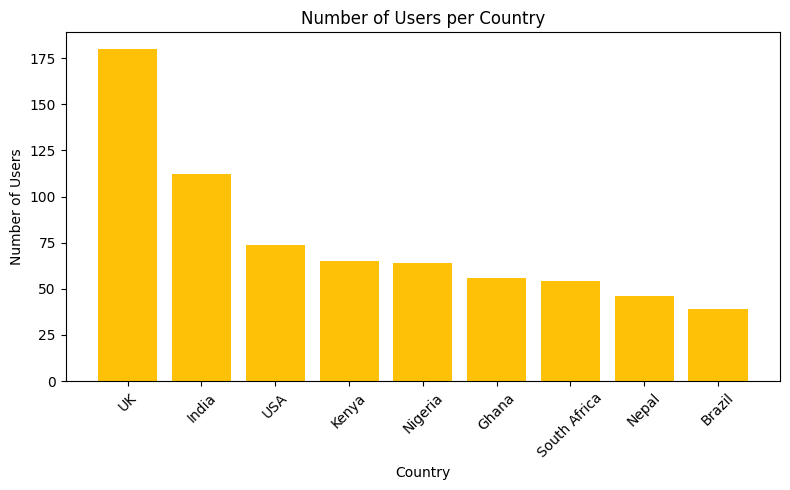

In [73]:
country_counts = cleaned_datawave_df['country'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(country_counts.index, 
        country_counts.values, 
        color='#FFC107')  # gold/amber contrast

plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("Number of Users per Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
country_counts.values

array([180, 112,  74,  65,  64,  56,  54,  46,  39])

##### Subscription type and low satisfaction

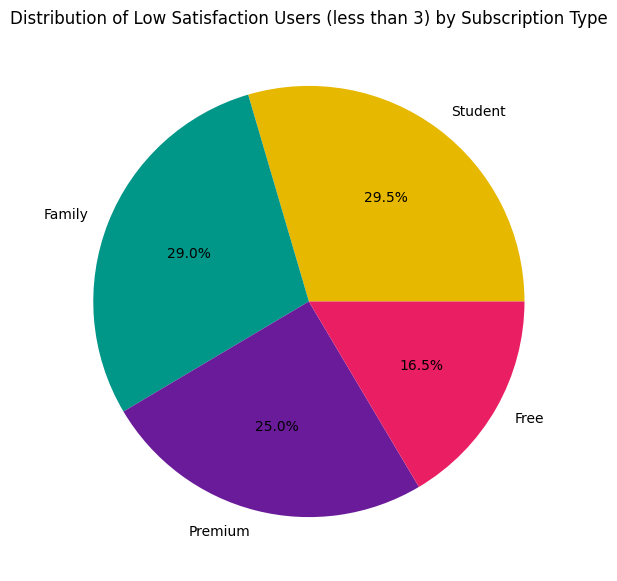

In [75]:
# Filter low-satisfaction users
low_sat = cleaned_datawave_df[cleaned_datawave_df['satisfaction_score'] < 3]

# Count subscription types
low_sat_counts = low_sat['subscription_type'].value_counts()

# 4-color palette
palette = ['#E6B800', '#009688', '#6A1B9A', '#E91E63']

low_sat_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7,7),
    colors=palette
)

plt.title("Distribution of Low Satisfaction Users (less than 3) by Subscription Type")
plt.ylabel("")
plt.show()



##### Subscription Type and Churn status

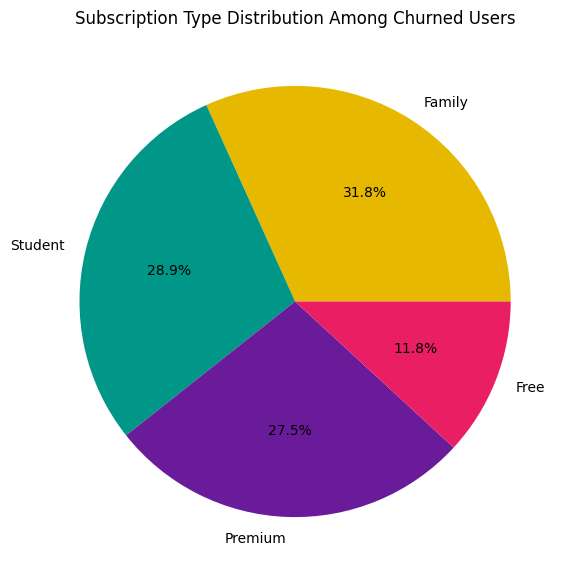

In [76]:
# Filter churned users
churned_users = cleaned_datawave_df[cleaned_datawave_df['churned'] == 1]

# Count subscription types
sub_churned_counts = churned_users['subscription_type'].value_counts()

# Use the same consistent palette
palette = ['#E6B800', '#009688', '#6A1B9A', '#E91E63']

sub_churned_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7,7),
    colors=palette
)

plt.title("Subscription Type Distribution Among Churned Users")
plt.ylabel("")
plt.show()


##### Average Listening Hours per Week by Age & Churn Status

C:\Users\Isioma Ekejiuba\AppData\Local\Temp\ipykernel_18160\889161955.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_listening_group = cleaned_datawave_df.groupby(['age_group','churned'])['avg_listening_hours_per_week'].mean().unstack()


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

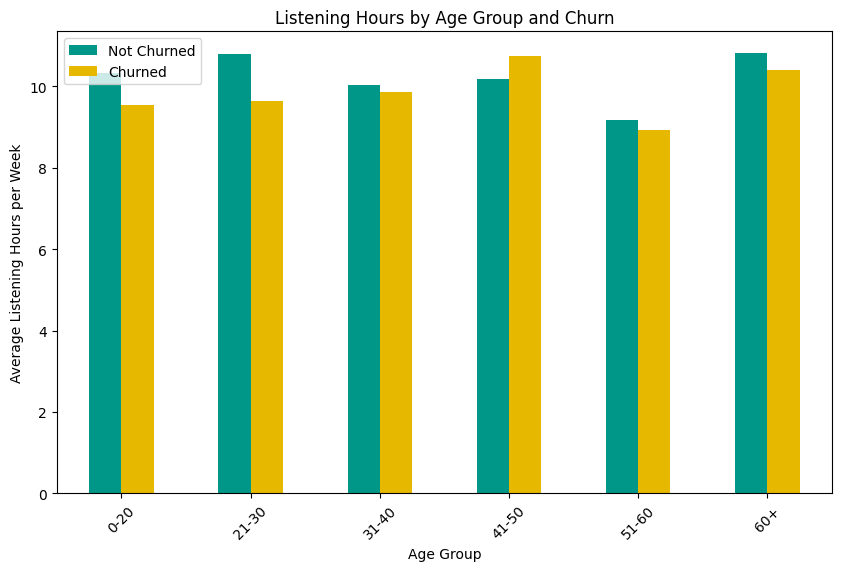

In [78]:
# Group by age group and churn, calculate mean (optional)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

cleaned_datawave_df['age_group'] = pd.cut(
    cleaned_datawave_df['age'], 
    bins=bins, 
    labels=labels
)

avg_listening_group = cleaned_datawave_df.groupby(['age_group','churned'])['avg_listening_hours_per_week'].mean().unstack()

avg_listening_group.plot(kind='bar', figsize=(10,6), color=['#009688', '#E6B800'])

plt.xlabel("Age Group")
plt.ylabel("Average Listening Hours per Week")
plt.title("Listening Hours by Age Group and Churn")
plt.legend(["Not Churned", "Churned"])
plt.xticks(rotation=45)
plt.tight_layout

In [79]:
avg_listening_group

churned,0,1
age_group,,
0-20,10.321250,9.536111
21-30,10.791358,9.647619
31-40,10.036264,9.852500
41-50,10.181132,10.747222
51-60,9.171053,8.921951
60+,10.806667,10.406250


##### Skip Rate and Churn Status

In [80]:
# Users who churned
churned_users = cleaned_datawave_df[cleaned_datawave_df['churned'] == 1]

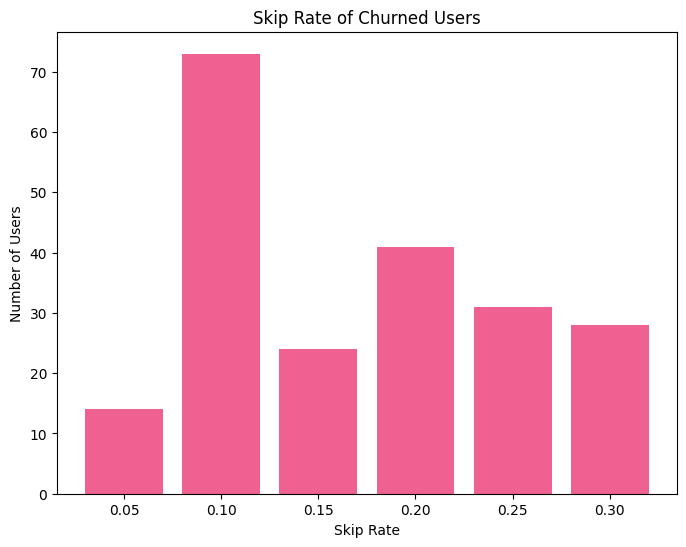

In [81]:

# Filter churned users
churned_users = cleaned_datawave_df[cleaned_datawave_df['churned'] == 1]

# Count number of users per rounded skip rate
skip_counts = churned_users['skip_rate'].value_counts().sort_index()

# Plot as bar chart
plt.figure(figsize=(8,6))
plt.bar(skip_counts.index, skip_counts.values, width=0.04, color='#E91E63', alpha=0.7)  # width matches rounding

plt.xlabel("Skip Rate")
plt.ylabel("Number of Users")
plt.title("Skip Rate of Churned Users")
plt.show()


In [82]:
cleaned_datawave_df['skip_rate'].unique()

array([0.05, 0.3 , 0.2 , 0.25, 0.15, 0.1 ])

##### Presentation: https://github.com/ice-alt/PortfolioProjects/blob/main/DataWave%20Music/DataWave%20Music%20Analytics%20Presentation.pptx